In [18]:
# import neccessary libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# read the csv dataset
dataset = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000


# **1. Check data quality**


In [20]:
# data preprocessing
dataset.columns
# drop rows with missing values
dataset.dropna(inplace=True)
# info() function is used to get a concise summary of the dataframe.
dataset.info()
# describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
dataset.describe()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       548 non-null    int64  
 1   Age                        548 non-null    object 
 2   GenderNum                  548 non-null    object 
 3   AutismQuotient             548 non-null    object 
 4   STAI                       548 non-null    object 
 5   BRIEF_Total                548 non-null    object 
 6   Device                     548 non-null    object 
 7   DailyAvgMins               548 non-null    object 
 8   DailyAvePickups            548 non-null    object 
 9   VS_RT_correct_Conjunction  548 non-null    float64
 10  VS_RT_correct_Single       548 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 47.2+ KB


,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000


# **2. Data relationship/Distribution**


## **2.a**


In [21]:
# Provide a Frequency table for the variable “Gender”
gender_data = dataset['GenderNum'].value_counts()
gender_data

2    414
1    118
      10
3      6
Name: GenderNum, dtype: int64

In [23]:
dataset

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,iPhone,507,,915.785917,747.883194
544,2020,27,2,5,64,77,iPhone,267,,877.783333,720.729583
545,2020,36,2,2,46,43,iPhone,610,,1211.483333,1049.979167
546,2020,31,2,4,67,69,iPhone,558,,899.774583,845.612083


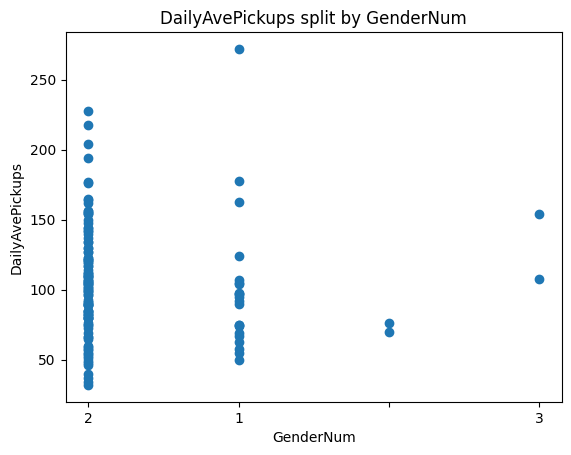

In [32]:
# plot an appropriate graph to visualize DailyAvePickups split by GenderNum
# plot a scatter diagram for all genders to explore the distribution of DailyAvePickups in each gender type
plt.scatter(dataset['GenderNum'], dataset['DailyAvePickups'])
plt.xlabel('GenderNum')
plt.ylabel('DailyAvePickups')
plt.title('DailyAvePickups split by GenderNum')
plt.show()

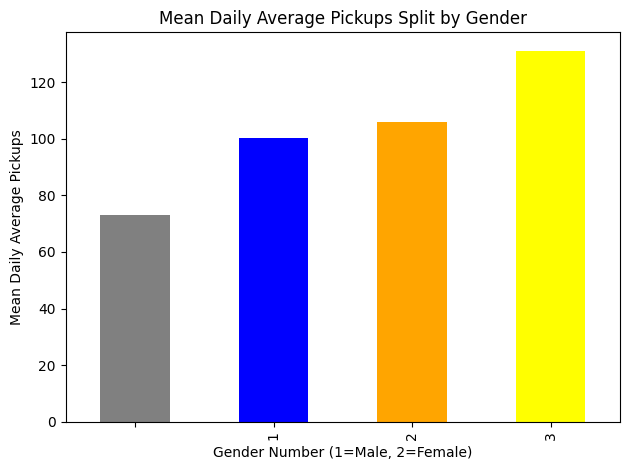

In [33]:
# plot an bar graph to visualize DailyAvePickups mean split by GenderNum
# convert the datatype of DailyAvePickups to numeric for mean calculation
dataset['DailyAvePickups'] = pd.to_numeric(dataset['DailyAvePickups'], errors='coerce')
# calculate the mean of DailyAvePickups split by GenderNum
mean_pickups_by_gender =dataset.groupby('GenderNum')['DailyAvePickups'].mean()
# plot the bar graph
mean_pickups_by_gender.plot(kind='bar', color=['gray', 'blue', 'orange', 'yellow'])
plt.title('Mean Daily Average Pickups Split by Gender')
plt.xlabel('Gender Number (1=Male, 2=Female)')
plt.ylabel('Mean Daily Average Pickups')
plt.tight_layout()


## **2.b**

In [51]:
# Provide a Frequency table and at least 2 different types of plots to visualize the distribution of Daily average minutes.
# Frequency table for the variable “DailyAvgMins”
daily_avg_minutes = dataset['DailyAvgMins'].value_counts()
daily_avg_minutes

       183
235      5
190      5
194      5
203      4
      ... 
121      1
154      1
523      1
284      1
88       1
Name: DailyAvgMins, Length: 245, dtype: int64

In [83]:
# first plot: histogram
# plot a histogram to visualize the distribution of DailyAvgMins
# drop rows with space in the column 'DailyAvgMins'
dataset_cleaned = dataset[dataset['DailyAvgMins'] != ' ']

# convert the datatype of DailyAvgMins to numeric and rearrange the DailyAvgMins in ascending order for histogram plotting
dataset_cleaned['DailyAvgMins'] = pd.to_numeric(dataset_cleaned['DailyAvgMins'], errors='coerce')
dataset_cleaned = dataset_cleaned.sort_values(by='DailyAvgMins', ascending=True)

# plt.hist(dataset_cleaned['DailyAvgMins'])
# plt.xticks(np.arange(0, 500, 50))
# plt.xlabel('Daily Average Minutes')
# plt.ylabel('Frequency')
# plt.title('Distribution of Daily Average Minutes')
# plt.show()

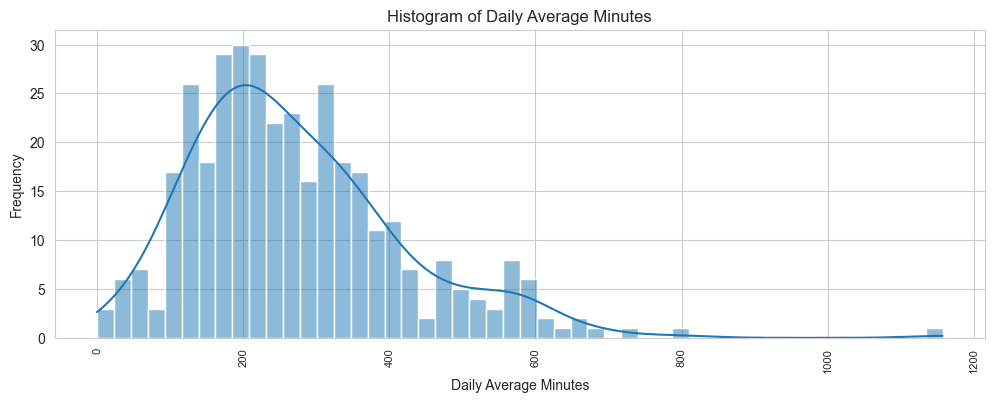

In [85]:
# import seaborn library
import seaborn as sns
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Histogram of 'DailyAvgMins'
plt.figure(figsize=(12, 4))
sns.histplot(dataset_cleaned['DailyAvgMins'], bins=50, kde=True)

plt.title('Histogram of Daily Average Minutes')
# Rotate x-axis tick labels to prevent overlap
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Daily Average Minutes')
plt.ylabel('Frequency')

# Display the plots
plt.show()


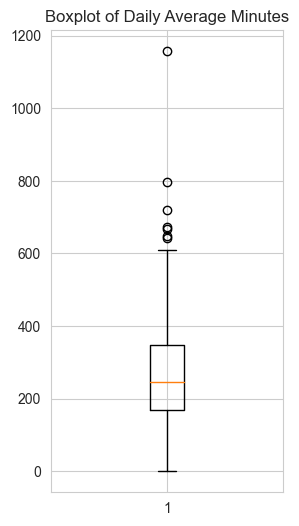

In [91]:
# second plot: boxplot
# plot a boxplot to visualize the distribution of DailyAvgMins
plt.figure(figsize=(3, 6))
plt.boxplot(dataset_cleaned['DailyAvgMins'])
plt.title('Boxplot of Daily Average Minutes')
plt.show()

## **2.c**

### **2.ci**


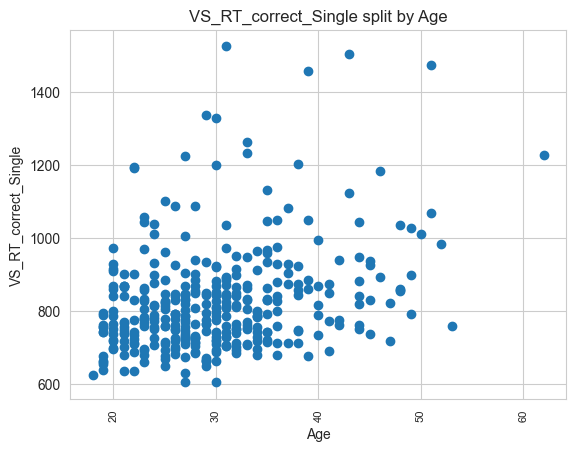

In [96]:
# Provide at least 2 appropriate plots to check the relationship between the variable 'Age' and 'VS_RT_correct_Single'
# drop rows with missing values in the column 'Age' and 'VS_RT_correct_Single'
dataset_cleaned2 = dataset[dataset['Age'] != ' ']
dataset_cleaned2 = dataset_cleaned2[dataset_cleaned2['VS_RT_correct_Single'] != ' ']

# convert the datatype of Age and VS_RT_correct_Single to numeric
dataset_cleaned2['Age'] = pd.to_numeric(dataset_cleaned2['Age'], errors='coerce')
# rearrange the data in ascending order for diagram plotting
dataset_cleaned2 = dataset_cleaned2.sort_values(by='Age', ascending=True)

# plot a scatter diagram to visualize the distribution of VS_RT_correct_Single split by Age
plt.scatter(dataset_cleaned2['Age'], dataset_cleaned2['VS_RT_correct_Single'])
plt.xlabel('Age')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('VS_RT_correct_Single')
plt.title('VS_RT_correct_Single split by Age')
plt.show()

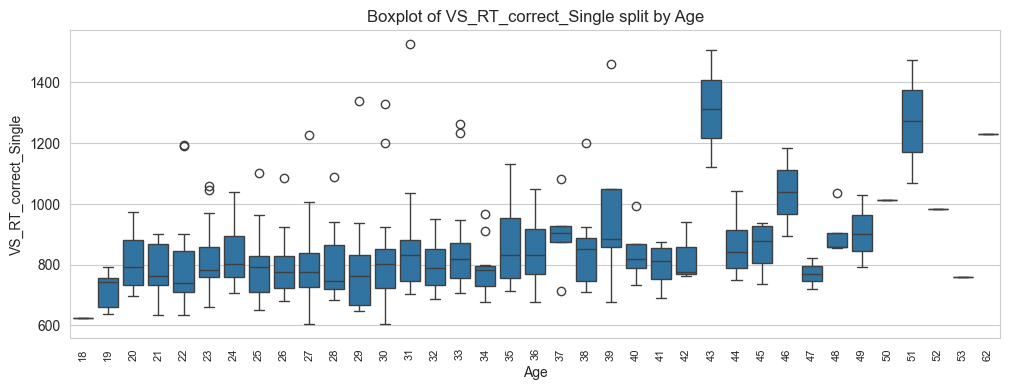

In [97]:
# plot a boxplot to visualize the distribution of VS_RT_correct_Single split by Age
plt.figure(figsize=(12, 4))
sns.boxplot(x='Age', y='VS_RT_correct_Single', data=dataset_cleaned2)
plt.title('Boxplot of VS_RT_correct_Single split by Age')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Age')
plt.ylabel('VS_RT_correct_Single')
plt.show()

### **2.cii**

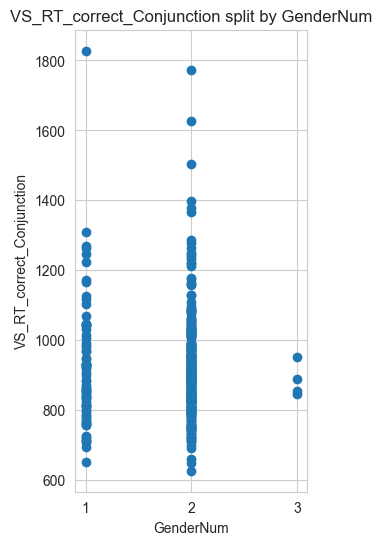

In [102]:
# Provide at least 2 appropriate plots to check the relationship between the variable 'GenderNum' and 'VS_RT_correct_Conjunction'
# drop rows with missing values in the column 'GenderNum' and 'VS_RT_correct_Conjunction'
dataset_cleaned3 = dataset[dataset['GenderNum'] != ' ']
dataset_cleaned3 = dataset_cleaned3[dataset_cleaned3['VS_RT_correct_Conjunction'] != ' ']

# convert the datatype of GenderNum and VS_RT_correct_Conjunction to numeric
dataset_cleaned3['GenderNum'] = pd.to_numeric(dataset_cleaned3['GenderNum'], errors='coerce')

# plot a scatter diagram to visualize the distribution of VS_RT_correct_Conjunction split by GenderNum
plt.figure(figsize=(3, 6))
plt.scatter(dataset_cleaned3['GenderNum'], dataset_cleaned3['VS_RT_correct_Conjunction'])
plt.xlabel('GenderNum')
plt.ylabel('VS_RT_correct_Conjunction')
# set x-axis tick labels as integer numbers
plt.xticks(np.arange(1, 4, 1))
plt.title('VS_RT_correct_Conjunction split by GenderNum')
plt.show()

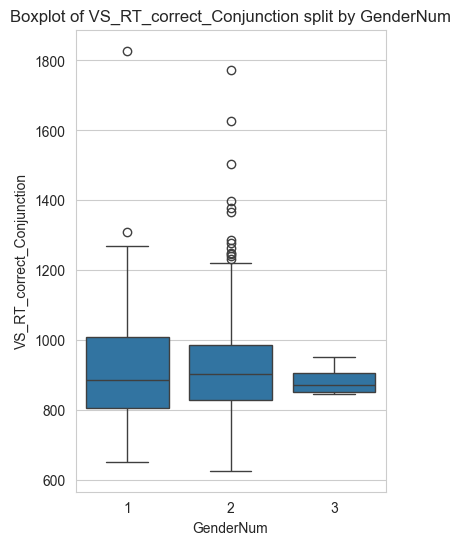

In [104]:
# plot a boxplot to visualize the distribution of VS_RT_correct_Conjunction split by GenderNum
plt.figure(figsize=(4, 6))
sns.boxplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=dataset_cleaned3)
plt.title('Boxplot of VS_RT_correct_Conjunction split by GenderNum')
plt.xlabel('GenderNum')
plt.ylabel('VS_RT_correct_Conjunction')
plt.show()

# **3. Correlation Check**

In [105]:
# Produce a bivariate correlation table between Age, STAI, BRIEF_Total, DailyAvgMins and VS_RT_correct_Single
# drop rows with missing values in the column 'Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins' and 'VS_RT_correct_Single'
dataset_cleaned4 = dataset[dataset['Age'] != ' ']
dataset_cleaned4 = dataset_cleaned4[dataset_cleaned4['STAI'] != ' ']
dataset_cleaned4 = dataset_cleaned4[dataset_cleaned4['BRIEF_Total'] != ' ']
dataset_cleaned4 = dataset_cleaned4[dataset_cleaned4['DailyAvgMins'] != ' ']
dataset_cleaned4 = dataset_cleaned4[dataset_cleaned4['VS_RT_correct_Single'] != ' ']

# convert the datatype of Age, STAI, BRIEF_Total, DailyAvgMins and VS_RT_correct_Single to numeric
dataset_cleaned4['Age'] = pd.to_numeric(dataset_cleaned4['Age'], errors='coerce')
dataset_cleaned4['STAI'] = pd.to_numeric(dataset_cleaned4['STAI'], errors='coerce')
dataset_cleaned4['BRIEF_Total'] = pd.to_numeric(dataset_cleaned4['BRIEF_Total'], errors='coerce')
dataset_cleaned4['DailyAvgMins'] = pd.to_numeric(dataset_cleaned4['DailyAvgMins'], errors='coerce')
dataset_cleaned4['VS_RT_correct_Single'] = pd.to_numeric(dataset_cleaned4['VS_RT_correct_Single'], errors='coerce')

# calculate the correlation between Age, STAI, BRIEF_Total, DailyAvgMins and VS_RT_correct_Single
dataset_cleaned4[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']].corr()

,Age,STAI,BRIEF_Total,DailyAvgMins,VS_RT_correct_Single
Age,1.000000,-0.097504,-0.062722,-0.147760,0.309269
STAI,-0.097504,1.000000,0.685272,0.024859,-0.083508
BRIEF_Total,-0.062722,0.685272,1.000000,0.097545,-0.023177
DailyAvgMins,-0.147760,0.024859,0.097545,1.000000,-0.044416
VS_RT_correct_Single,0.309269,-0.083508,-0.023177,-0.044416,1.000000


# **4. Linear Regression**

In [113]:
# Perform a linear regression to see if DailyAvgMins predicts VS_RT_correct_Single
# drop rows with missing values in the column 'DailyAvgMins' and 'VS_RT_correct_Single'
dataset_cleaned5 = dataset[dataset['DailyAvgMins'] != ' ']
dataset_cleaned5 = dataset_cleaned5[dataset_cleaned5['VS_RT_correct_Single'] != ' ']

# convert the datatype of DailyAvgMins and VS_RT_correct_Single to numeric
dataset_cleaned5['DailyAvgMins'] = pd.to_numeric(dataset_cleaned5['DailyAvgMins'], errors='coerce')
dataset_cleaned5['VS_RT_correct_Single'] = pd.to_numeric(dataset_cleaned5['VS_RT_correct_Single'], errors='coerce')

# import statsmodels library
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# define the dependent and independent variables
X = dataset_cleaned5['DailyAvgMins']
y = dataset_cleaned5['VS_RT_correct_Single']

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# Retrieve the coefficient of determination (R^2)
r_squared = model.score(X.values.reshape(-1, 1), y)

# Retrieve the regression coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

print('R-squared: ', r_squared, '\nSlope: ', slope, '\nIntercept: ', intercept)

R-squared:  0.0015217551087856052 
Slope:  -0.0373918076224221 
Intercept:  834.4638450997868


The coefficient of determination (R²) is approximately 0.00152. This value is very close to 0, suggesting that 'DailyAvgMins' does not explain a significant proportion of the variance in 'VS_RT_correct_Single'.

The slope of the regression line is approximately -0.03739. This implies that for each additional minute in the daily average, the 'VS_RT_correct_Single' score decreases by about 0.03739 units, on average.

The intercept is approximately 834.46. This represents the expected value of 'VS_RT_correct_Single' when 'DailyAvgMins' is 0.

### **Considering the low R² value, 'DailyAvgMins' does not appear to be a strong predictor of 'VS_RT_correct_Single'.**

# **5. Multiple Regression**

In [117]:
# Add predictors Age, GenderNum, STAI, BRIEF_Total and DailyAvgPickups to the multiple regression model.
from sklearn.linear_model import LinearRegression

# Load the dataset again
df = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

# Convert the relevant columns to numeric, coerce errors to NaN
# The correct column names are taken from the dataframe's columns list
cols_to_convert = ['Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single', 'DailyAvePickups']

for col in cols_to_convert:
    # Some columns may already be in the correct type, so we check before converting
    if df[col].dtype == 'O':  # Column has object type
        df[col] = pd.to_numeric(df[col].str.replace('[^\d.]', '', regex=True), errors='coerce')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values from these columns to clean the data
df_clean = df.dropna(subset=cols_to_convert)

# Extract the independent variables (X) and the dependent variable (y)
X = df_clean[['Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups']]  # Predictor variables
y = df_clean['VS_RT_correct_Single']  # Response variable

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get the model's coefficient of determination (R^2), coefficients, and intercept
r_squared = model.score(X, y)
coefficients = model.coef_
intercept = model.intercept_

print('R-squared: ', r_squared, '\nCoefficients: ', coefficients, '\nIntercept: ', intercept)

R-squared:  0.21808725864266787 
Coefficients:  [ 7.04921494 36.66334124 -2.80639679  0.11052274 -0.68947182] 
Intercept:  762.9761963277723


### **Explanation to the outputs**

The coefficient of determination (R²) is approximately 0.218, which means that about 21.8% of the variability in 'VS_RT_correct_Single' can be explained by the model.

The regression coefficients for each predictor are as follows:

'Age': 7.0492

'GenderNum': 36.6633

'STAI': -2.8064

'BRIEF_Total': 0.1105

'DailyAvePickups': -0.6895

The positive coefficients indicate that there is a positive association between the predictor and the response variable, while the negative coefficients indicate a negative association. For example, as 'Age' increases by one unit, 'VS_RT_correct_Single' is expected to increase by about 7.0492 units, holding all other predictors constant.


The intercept of the regression line is approximately 762.976.

In [118]:
# Load the dataset again
df = pd.read_csv('MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

# Convert the relevant columns to numeric, coerce errors to NaN
# The correct column names are taken from the dataframe's columns list
cols_to_convert = ['Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single', 'DailyAvePickups']

for col in cols_to_convert:
    # Some columns may already be in the correct type, so we check before converting
    if df[col].dtype == 'O':  # Column has object type
        df[col] = pd.to_numeric(df[col].str.replace('[^\d.]', '', regex=True), errors='coerce')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values from these columns to clean the data
df_clean = df.dropna(subset=cols_to_convert)

# Extract the independent variables (X) and the dependent variable (y) without DailyAvgMins
X_without_dailyavgmins = df_clean[['Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups']]  # Predictor variables
y = df_clean['VS_RT_correct_Single']  # Response variable

# Initialize and fit the Linear Regression model without DailyAvgMins
model_without_dailyavgmins = LinearRegression()
model_without_dailyavgmins.fit(X_without_dailyavgmins, y)

# Get the model's coefficient of determination (R^2) without DailyAvgMins
r_squared_without_dailyavgmins = model_without_dailyavgmins.score(X_without_dailyavgmins, y)

# Perform the multiple regression analysis with DailyAvgMins
X_with_dailyavgmins = df_clean[['Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups', 'DailyAvgMins']]  # Predictor variables

# Initialize and fit the Linear Regression model with DailyAvgMins
model_with_dailyavgmins = LinearRegression()
model_with_dailyavgmins.fit(X_with_dailyavgmins, y)

# Get the model's coefficient of determination (R^2) with DailyAvgMins
r_squared_with_dailyavgmins = model_with_dailyavgmins.score(X_with_dailyavgmins, y)

# Compare the R-squared values
r_squared_difference = r_squared_with_dailyavgmins - r_squared_without_dailyavgmins

# Check if DailyAvgMins is a significant predictor using p-values
import statsmodels.api as sm

X_with_dailyavgmins = sm.add_constant(X_with_dailyavgmins)  # Add constant term for statsmodels

model_with_dailyavgmins_sm = sm.OLS(y, X_with_dailyavgmins).fit()  # Fit the OLS model with DailyAvgMins

# Get the p-values for each predictor
p_values = model_with_dailyavgmins_sm.pvalues

# Check if DailyAvgMins has a p-value less than 0.05 (common significance level)
is_dailyavgmins_significant = p_values['DailyAvgMins'] < 0.05

r_squared_difference, is_dailyavgmins_significant


(8.859827476115356e-07, False)

### **Explanation to the outputs**
The change of the R squared is very minimal, indicating that 'DailyAvgMins' does not significantly increase the amount of variance accounted for in the outcome.

To formally test the statistical significance of 'DailyAvgMins' as a predictor, we would typically look at the p-value associated with its coefficient. A common threshold for significance is a p-value of less than 0.05. As the test result came out as "False", therefore means that the predictor "DailyAvgMins" is not statistically significant at the conventional 0.05 significance level. 

# **6. Scenario1**

# **7. Scenario2**